# Dataset Exploration

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits

In [9]:
X, y = load_digits(return_X_y=True)

### Features

In [10]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

### Labels

In [11]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Images

In [12]:
print(f"Min: {int(np.min(X))}")
print(f"Max: {int(np.max(X))}")

Min: 0
Max: 16


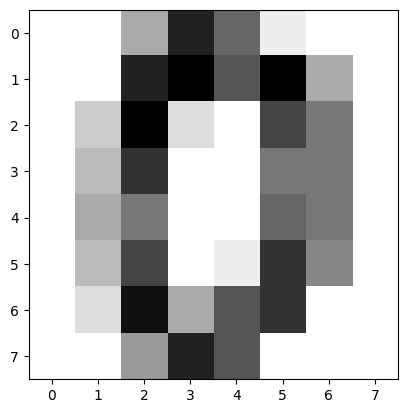

In [13]:
image = X[0].reshape(8, 8)

plt.imshow(image, cmap="gray_r")
plt.gca().grid(which="major", visible=False)

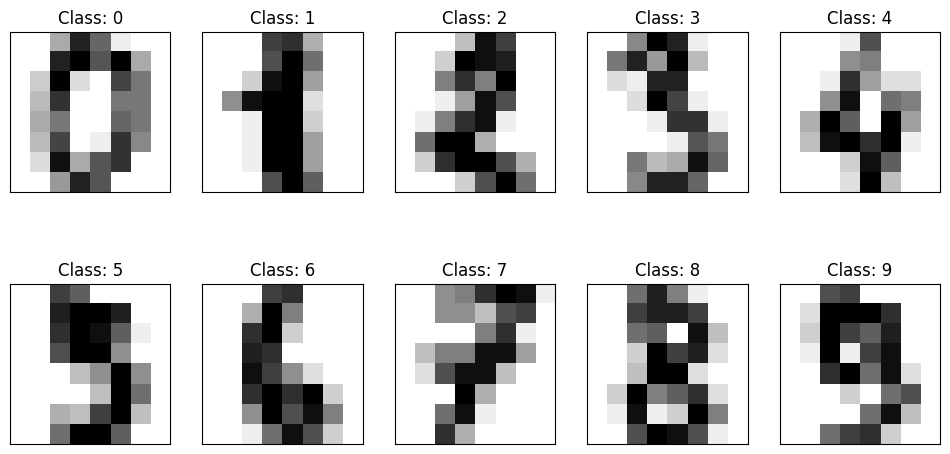

In [14]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    axes[i // 5, i % 5].imshow(X[i].reshape(8, 8), cmap="gray_r")
    axes[i // 5, i % 5].set_title(f"Class: {y[i]}")
    axes[i // 5, i % 5].grid(which="both", visible=False)
    axes[i // 5, i % 5].set_xticks([])
    axes[i // 5, i % 5].set_yticks([])